In [2]:
import numpy as np
import pandas as pd

In [3]:
testing_letter = pd.read_csv(r"C:\Users\manas\OneDrive\Desktop\audio_dataset\EMNIST\emnist-letters-test.csv")
training_letter = pd.read_csv(r"C:\Users\manas\OneDrive\Desktop\audio_dataset\EMNIST\emnist-letters-train.csv")

In [4]:
print(training_letter.shape)
print(testing_letter.shape)

(88799, 785)
(14799, 785)


In [6]:
#training_labels
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
#testing_labels
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)
print(y2.shape)
print(x2.shape)

(88799,)
(88799, 784)
(14799,)
(14799, 784)


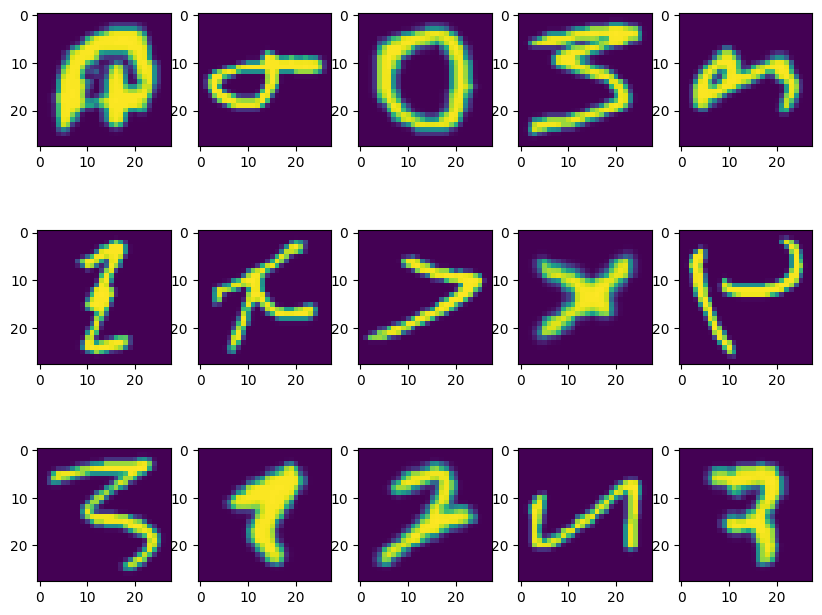

In [7]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))

In [9]:
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [11]:
import tensorflow as tf
number_of_classes = 37
y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

In [12]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Dropout,MaxPooling2D,Conv2D, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, 3, activation='relu'), 
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(number_of_classes, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 512)                 │         819,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 37)                  │           4,773 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 908,965 (3.47 MB)

 Trainable params: 908,965 (3.47 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint(filepath=r'C:\Users\manas\OneDrive\Desktop\audio_dataset\handwritten_digit_recognition.keras',
                                   monitor='val_accuracy',
                                   save_best_only=True,
                                   mode='max',
                                   verbose=1)
RLP = ReduceLROnPlateau(monitor='val_loss',
                        patience=3,
                        factor=0.2,
                        min_lr=0.0001)

In [25]:
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping, model_checkpoint, RLP],
                    verbose=1)

print("\nModel training complete!")

Epoch 1/50
2219/2220 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6810 - loss: 1.0464 
Epoch 1: val_accuracy improved from -inf to 0.89910, saving model to C:\Users\manas\OneDrive\Desktop\audio_dataset\handwritten_digit_recognition.keras
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.6811 - loss: 1.0460 - val_accuracy: 0.8991 - val_loss: 0.3073 - learning_rate: 0.0010
Epoch 2/50
2217/2220 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8999 - loss: 0.3159 
Epoch 2: val_accuracy improved from 0.89910 to 0.90968, saving model to C:\Users\manas\OneDrive\Desktop\audio_dataset\handwritten_digit_recognition.keras
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.8999 - loss: 0.3159 - val_accuracy: 0.9097 - val_loss: 0.2716 - learning_rate: 0.0010
Epoch 3/50
2218/2220 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9182 - loss: 0.2518 
Epoch 3: val_accuracy improved from 0.90968 to 0.92461, saving model to C:\Users\manas\OneDrive\Desktop\audio_dataset\handwritten_digit

Text(0, 0.5, 'Accuracy')

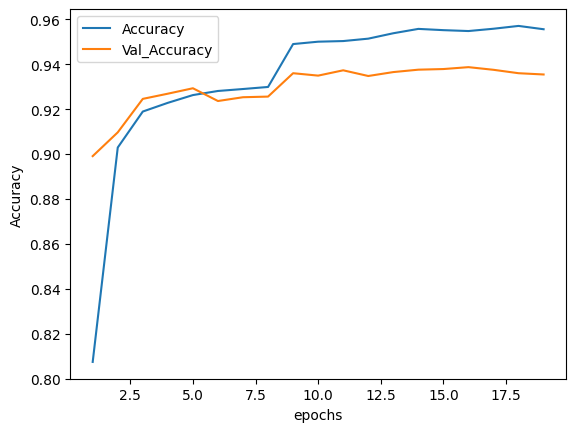

In [30]:
import seaborn as sns

q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [31]:
print("\nEvaluating model on test data")
test_loss, test_accuracy = model.evaluate(test_x, test_y, verbose=1)

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nEvaluation complete.")


Evaluating model on test data
555/555 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9370 - loss: 0.2002

Test Loss: 0.2038
Test Accuracy: 0.9360

Evaluation complete.
